In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


filePath="D3.csv"

df = pd.read_csv(filePath, index_col=False)

X_df = df.iloc[:, :-1]

data = df.to_numpy()

X1 = data[:,0]
X2 = data[:,1]
X3 = data[:,2]
Y = data[:,3]

m = len(Y)

# plt.scatter(X1, Y)
# plt.show

In [5]:
def gen_data(df: pd.DataFrame):
    X_df = df.iloc[:, :-1]
    data = X_df.to_numpy()
    
    Y = df.iloc[:, -1].to_numpy().reshape(-1,1)
    
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X, Y

In [6]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = (1/ (2*m) ) * np.sum(sqrErrors)
    
    return J, predictions

In [7]:
def grad_desc(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, alpha: float, iterations: int):
    m = len(Y)
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        
        sum_deltas = (alpha/m) * X.T.dot(errors)
        
        theta -= sum_deltas
        
        sqrErrors = np.square(errors)
        cost_history[i]= (1/ (2*m) ) * np.sum(sqrErrors)
    
    return theta,cost_history

In [8]:
def print_model(X, Y, theta, name='Y'):
    
    cost, pred = compute_cost(X,Y,theta)
    
    model_str = ""
    
    for i in range(theta.shape[0]-1, -1, -1):
        if i == 0:
            model_str += f"{round(theta[i,0], 3)}"
            break
        model_str += f"{round(theta[i,0], 3)}*X{i} + "
    
    print(f"Model:\n    {name} = {model_str}") 
    print(f"    cost = {round(cost, 3)}")
    return pred

Model:
    y1 = -1.96*X1 + 5.725
    cost = 0.99
Model:
    y2 = 0.564*X1 + 0.72
    cost = 3.599
Model:
    y3 = -0.486*X1 + 2.784
    cost = 3.63




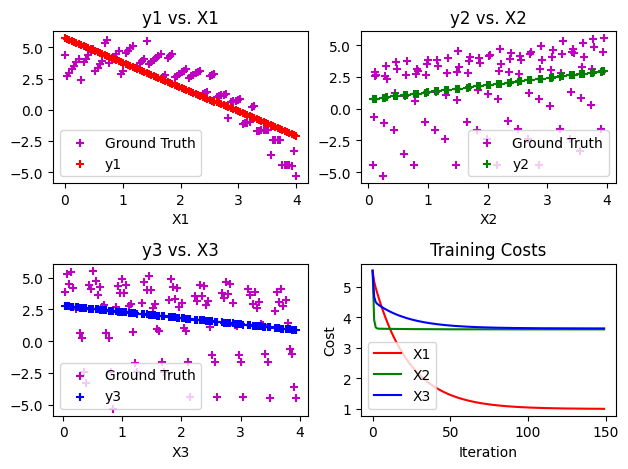

In [27]:
# Sequential Training
X,Y = gen_data(df)

iterations = 150 
alpha = 0.1

thetas = np.zeros(( 2,1,X.shape[1] ))

fig, ax = plt.subplots(2,2, squeeze=True)

axes: np.ndarray[plt.Axes] = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
colors = ['r', 'g', 'b']

plots = []

iters = range(iterations)
for i in range(1,4):
    
    X_i = np.hstack(( X[:,0].reshape(-1,1), X[:,i].reshape(-1,1) ))
    
    theta_col = np.zeros((2,1))
    theta_col, cost_history = grad_desc(X_i, Y, theta_col, alpha, iterations)
    
    pred = print_model(X_i, Y, theta_col, f"y{i}")
    pred = X_i.dot(theta_col)
    
    axes[i-1].scatter(X[:,i], Y, label=f"Ground Truth", color='m', marker='+')
    axes[i-1].scatter(X[:,i], pred, label=f"y{i}", color=colors[i-1], marker='+')
    axes[i-1].legend()
    axes[i-1].set_xlabel(f"X{i}")
    # axes[i-1].set_ylabel(f"y{i}")
    axes[i-1].set_title(f"y{i} vs. X{i}")
    
    axes[3].plot(iters, cost_history, label=f"X{i}", color=colors[i-1])
#    plt.plot(iters, cost_history, label=f"X{i}")
    
    #print(f"cost for X{i} = {cost}")

#gen_subplots(plots)
plt.title("Training Costs")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()

print('\n')
#print_model(X, Y, theta)
plt.tight_layout()

plt.show()


# Problem 1
## Model Results
- The models found by this technique were:
    - y1 = -1.96*X1 + 5.725
    - y2 = 0.564*X2 + 0.72
    - y3 = -0.486*X3 + 2.784
- The lowest cost for explaining the output was X1, whose cost was 

abc


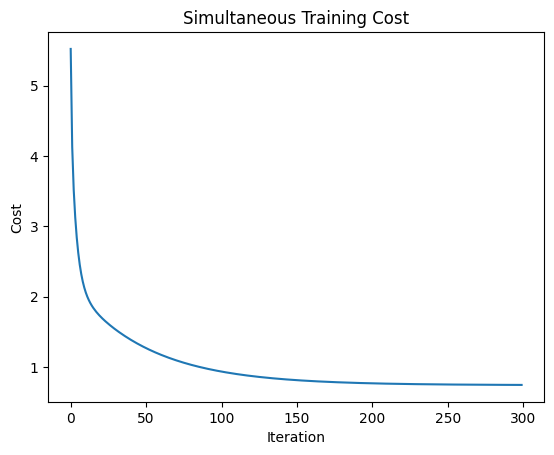

In [31]:
#Simultaneous Descent
theta = np.zeros((X.shape[1], 1))

# 300 iters vs. 1000 iters only has a difference of .004 in cosst
iterations = 300
# Model still converges at max alpha
alpha = 0.1

theta, cost_history = grad_desc(X, Y, theta, alpha, iterations)

plt.plot(range(iterations), cost_history)
plt.title("Simultaneous Training Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")

print_model(X, Y, theta)
print('')

In [11]:
X_pred = np.array([
#   X0,1,2,3
    [1,1,1,1],
    [1,2,0,4],
    [1,3,2,1]
    ])
y_bar = X_pred.dot(theta)

print(y_bar)

[[3.43683118]
 [0.21061073]
 [0.07705293]]
